# Model Training

In [9]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, train_lstm_model, train_cnn_model
from src.utils import plot_training_history
from src.evaluation import evaluate_regression_model, evaluate_classification_model

# Load the default configuration
config = Config()

## LSTM

2025-03-11 11:17:24,279 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.65


Loaded best hyperparameters from experiments/hyperparameter_tuning/Experiment1_lstm_regression_tuning_eol65_best_params.json: {'lstm_units': 48, 'lstm_dropout_rate': 0.4, 'lstm_dense_units': 56, 'learning_rate': 0.01, 'clipnorm': 0.5}


2025-03-11 11:17:24,627 - INFO - LSTM model built with tuned config: Config(project_name='Experiment1', data_path='data/raw/Degradation_Prediction_Dataset_ISEA.mat', eol_capacity=0.65, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=120, train_split_ratio=0.8, val_split_ratio=0.2, batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', conv1_filters=32, conv1_kernel_size=11, conv2_filters=64, conv2_kernel_size=7, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64, cnn_dropout_rate=0.2)


Epoch 1/50
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0234 - mae: 0.1074
Epoch 1: val_loss improved from inf to 0.01864, saving model to experiments/models/lstm_regression_eol65_20250311_111724_best.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0233 - mae: 0.1072 - val_loss: 0.0186 - val_mae: 0.1156
Epoch 2/50
139/142 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100 - mae: 0.0772
Epoch 2: val_loss improved from 0.01864 to 0.01265, saving model to experiments/models/lstm_regression_eol65_20250311_111724_best.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0100 - mae: 0.0770 - val_loss: 0.0126 - val_mae: 0.0947
Epoch 3/50
138/142 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0097 - mae: 0.0719
Epoch 3: val_loss did not improve from 0.01265
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0097 - mae: 0.0718 - val_loss: 0.0363 - val_mae: 0.1668
Epoch 4/50
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0106 - mae: 0.0774
Epoch 4: val_loss improved from 0

2025-03-11 11:18:55,850 - INFO - Final LSTM model saved to experiments/models/lstm_regression_eol65_20250311_111855_final.keras


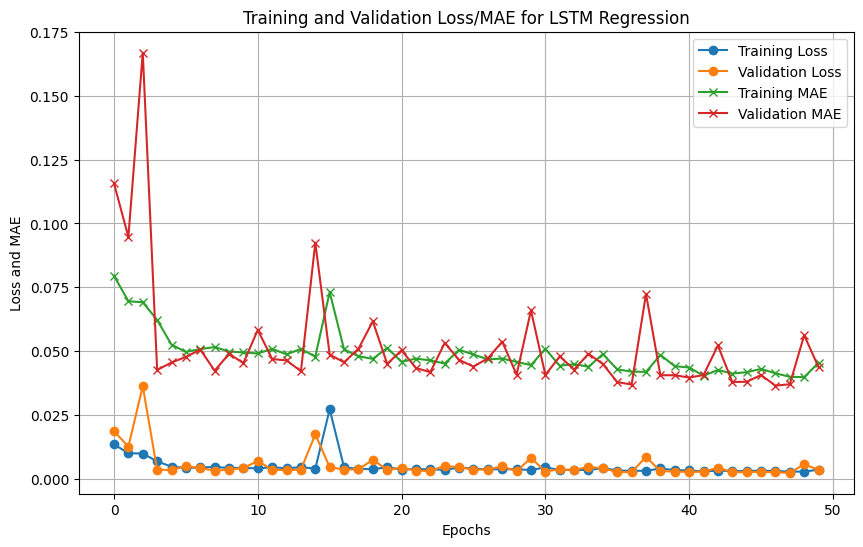

In [2]:
model_task = "lstm_regression"

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)

lstm_model, history = train_lstm_model(config, X_train, y_train, X_val, y_val)

# Plot the training history
plot_training_history(history, model_task)

## CNN

2025-03-11 11:18:55,992 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.65


Loaded best hyperparameters from experiments/hyperparameter_tuning/Experiment1_cnn_classification_tuning_eol65_best_params.json: {'conv1_filters': 32, 'conv1_kernel_size': 9, 'l2_reg': 0.0005, 'conv2_filters': 64, 'conv2_kernel_size': 9, 'conv3_filters': 64, 'conv3_kernel_size': 3, 'cnn_dense_units': 192, 'cnn_dropout_rate': 0.4, 'learning_rate': 0.0001}


2025-03-11 11:18:56,041 - INFO - CNN model built with tuned config: Config(project_name='Experiment1', data_path='data/raw/Degradation_Prediction_Dataset_ISEA.mat', eol_capacity=0.65, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=120, train_split_ratio=0.8, val_split_ratio=0.2, batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', conv1_filters=32, conv1_kernel_size=9, conv2_filters=64, conv2_kernel_size=9, conv3_filters=64, conv3_kernel_size=3, l2_reg=0.0005, cnn_dense_units=192, cnn_dropout_rate=0.4)


Epoch 1/50
138/142 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3652 - loss: 1.8041
Epoch 1: val_loss improved from inf to 2.18316, saving model to experiments/models/cnn_classification_eol65_20250311_111856_best.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3681 - loss: 1.7938 - val_accuracy: 0.1594 - val_loss: 2.1832
Epoch 2/50
139/142 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5462 - loss: 1.2547
Epoch 2: val_loss did not improve from 2.18316
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5464 - loss: 1.2540 - val_accuracy: 0.1594 - val_loss: 2.3263
Epoch 3/50
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5840 - loss: 1.1605
Epoch 3: val_loss did not improve from 2.18316
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5842 - loss: 1.1601 - val_accuracy: 0.1665 - val_loss: 2.3099
Epoch 4/50
140/142 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5984 - loss: 1.1303
Epoch 4: val_loss improved from 2.18316 to 1.93379, saving model to experime

2025-03-11 11:19:38,958 - INFO - Final CNN model saved to experiments/models/cnn_classification_eol65_20250311_111938_final.keras


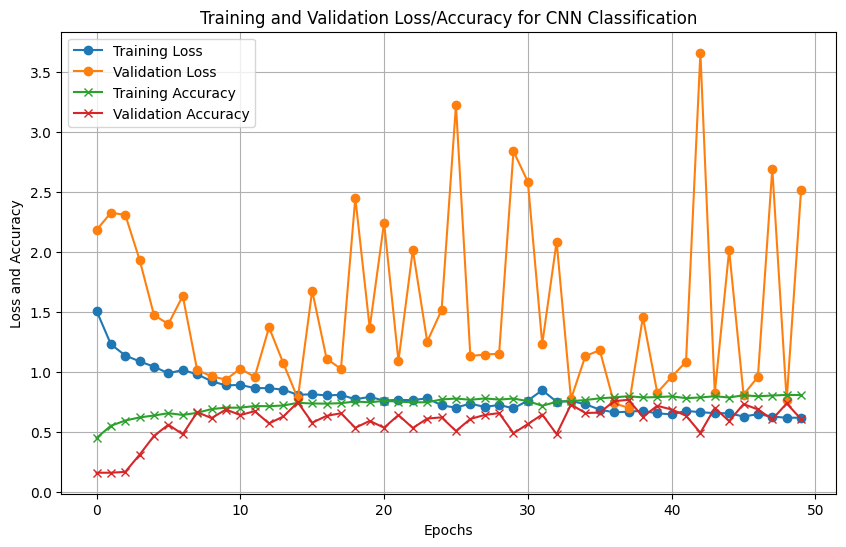

In [3]:
model_task = "cnn_classification"

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity
)

# Update the configuration to use the best hyperparameters found in the hyperparameter tuning step
config.load_best_params(model_task)

cnn_model, history = train_cnn_model(config, X_train, y_train, X_val, y_val)

# Plot the training history
plot_training_history(history, model_task)